# Importing Libraries

In [13]:
# Data imports 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

In [14]:
# Read data
data = pd.read_csv('netflix_titles (1).csv')

## Data Exploration

In [15]:
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [17]:
data.shape

(8807, 12)

In [18]:
data.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

## Data Cleaning 

In [19]:
# Replace null values for Director,Country and Cast
data['director'].replace(np.nan, 'No Director',inplace=True)
data['country'].replace(np.nan, 'No Country', inplace=True)
data['cast'].replace(np.nan, 'No Cast',inplace=True)

In [20]:
data.isnull().sum()

show_id          0
type             0
title            0
director         0
cast             0
country          0
date_added      10
release_year     0
rating           4
duration         3
listed_in        0
description      0
dtype: int64

In [21]:
# Counting Duplicate Values
duplicate_count = data[data.duplicated()].shape[0]
print(f"Check Duplicate Values : {duplicate_count}")


Check Duplicate Values : 0


### Rating types

In [22]:
data['rating'].value_counts()

TV-MA       3207
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
TV-Y7-FV       6
NC-17          3
UR             3
74 min         1
84 min         1
66 min         1
Name: rating, dtype: int64

In [23]:
# Check for all unique values in column 'rating'
print(data['rating'].unique())

['PG-13' 'TV-MA' 'PG' 'TV-14' 'TV-PG' 'TV-Y' 'TV-Y7' 'R' 'TV-G' 'G'
 'NC-17' '74 min' '84 min' '66 min' 'NR' nan 'TV-Y7-FV' 'UR']


In [24]:
# Set duration values to null
data['rating'] = data['rating'].replace({'74 min' : np.nan, '84 min' : np.nan, '66 min': np.nan ,'G' : 'TV-G'})

In [25]:
# Check for all unique values in column 'rating'
print(data['rating'].unique())

['PG-13' 'TV-MA' 'PG' 'TV-14' 'TV-PG' 'TV-Y' 'TV-Y7' 'R' 'TV-G' 'NC-17'
 nan 'NR' 'TV-Y7-FV' 'UR']


In [26]:
data.isna().sum()

show_id          0
type             0
title            0
director         0
cast             0
country          0
date_added      10
release_year     0
rating           7
duration         3
listed_in        0
description      0
dtype: int64

In [27]:
# Fill null values of date_added, rating and duration
mode_for = ['date_added','rating', 'duration']
for i in mode_for:
    data[i] = data[i].fillna(data[i].mode()[0])

In [28]:
data.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

## Data Visualization

In [29]:
data.type.value_counts() #value_counts method shows the counts of different categories in a given column # look at the type of shows that has been watched on Netflix

Movie      6131
TV Show    2676
Name: type, dtype: int64

Text(0.5, 1.0, 'Count vs Type of Shows')

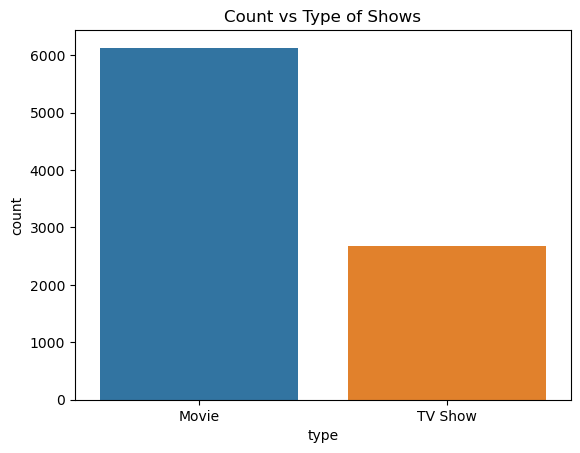

In [33]:
sns.countplot(x = "type" , data = data)#use countplot to vizualize the digits or the findings above #countplot helps us to plot counts of each category
plt.title("Count vs Type of Shows") #On Netflix there are more nr of Movies than TV shows


In [34]:
 data["country"].value_counts().head(10) # top 10 countries in the dataset who produce content on Netflix

United States     2818
India              972
No Country         831
United Kingdom     419
Japan              245
South Korea        199
Canada             181
Spain              145
France             124
Mexico             110
Name: country, dtype: int64

Text(0.5, 1.0, 'Country Wize Content on Netflix')

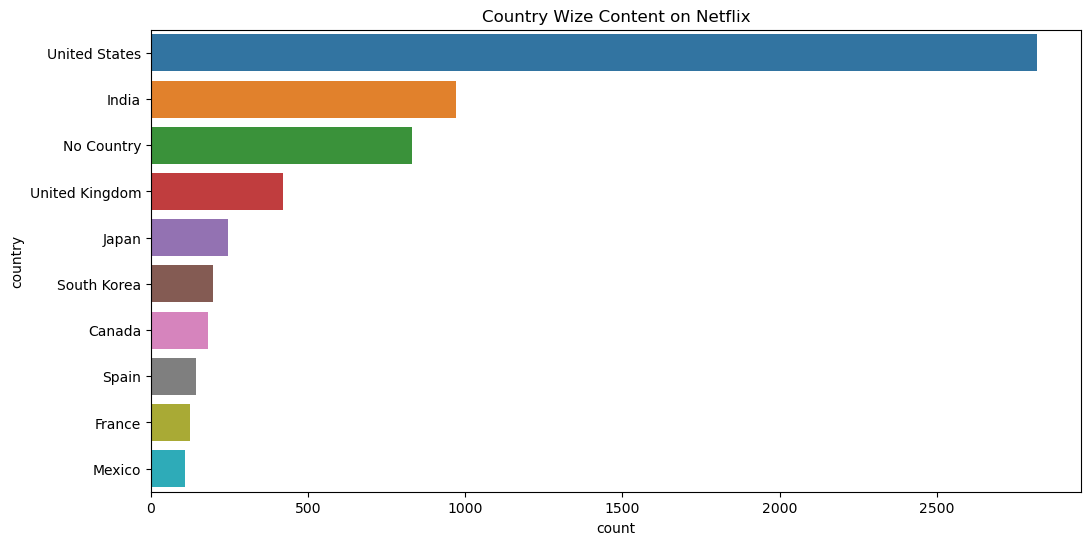

In [36]:
plt.figure(figsize = (12,6)) #we need to visualize the above insight
sns.countplot(y= "country" ,order =data["country"].value_counts().index[0:10],data = data)
plt.title("Country Wize Content on Netflix")

Text(0.5, 1.0, 'Top 10 Countries producing Movies on Netflix')

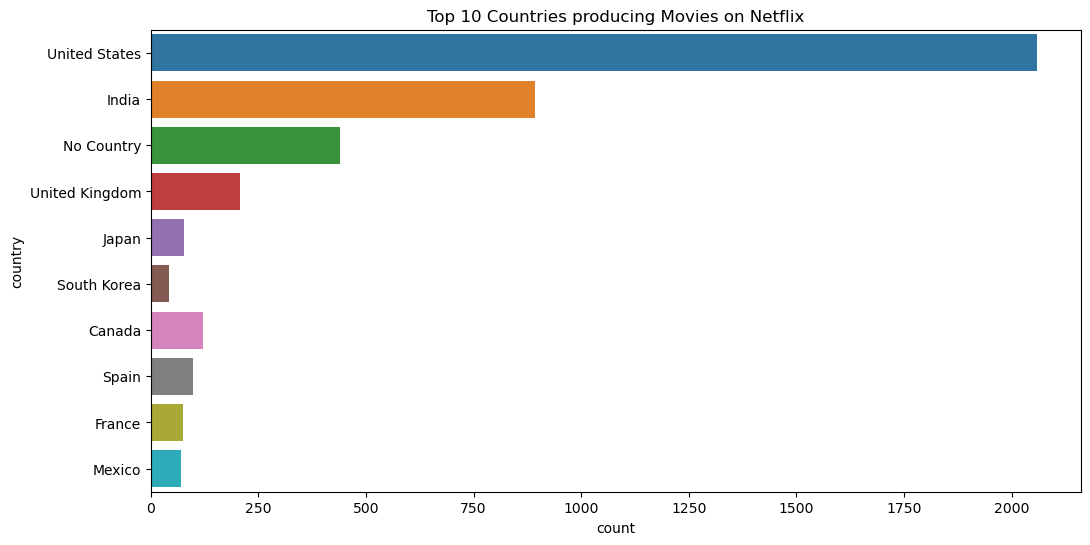

In [39]:
movie_countries = data[data["type"] == "Movie"] #now checking type of content based on country
tv_show_countries = data[data["type"] == "TV Show"]
plt.figure(figsize = (12,6)) #vizualize the above Movies insights
sns.countplot(y = "country" ,order = data["country"].value_counts().index[0:10],data = movie_countries)
plt.title("Top 10 Countries producing Movies on Netflix")

Text(0.5, 1.0, 'Top 10 Countries producing TV Shows  on Netflix')

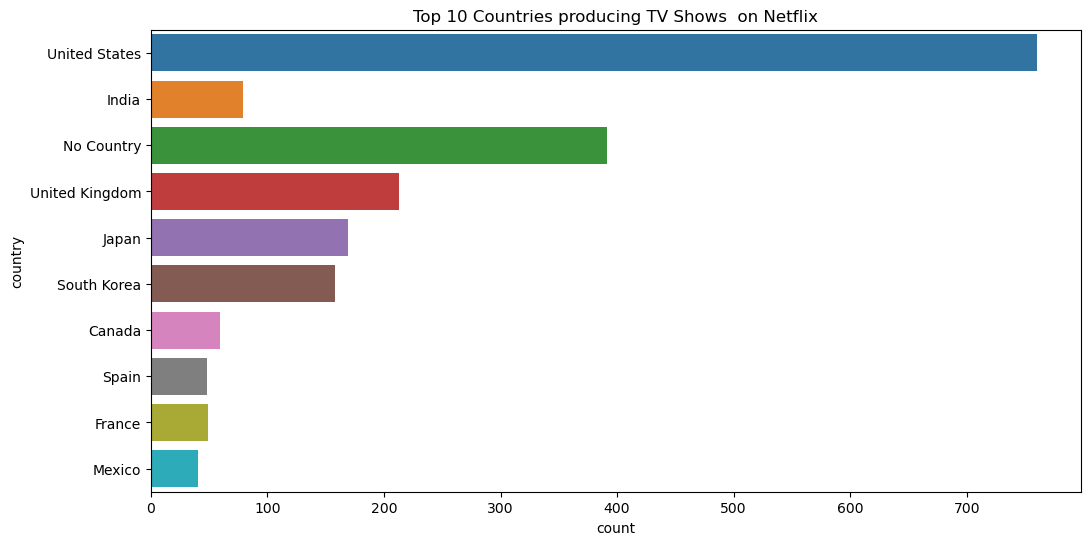

In [41]:
plt.figure(figsize = (12,6)) #vizualize the above Tv Shows insights
sns.countplot(y = "country" ,order = data["country"].value_counts().index[0:10],data = tv_show_countries)
plt.title("Top 10 Countries producing TV Shows  on Netflix")

Text(0.5, 1.0, 'Rating of Shows  on Netflix vs Count')

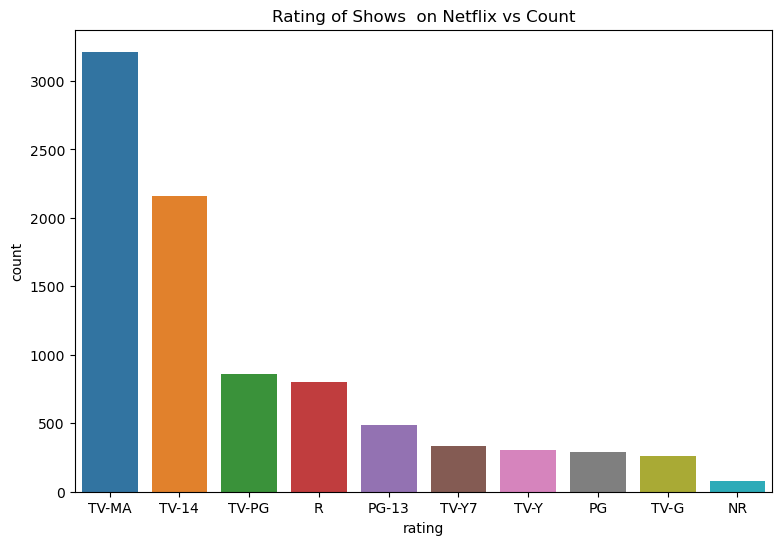

In [42]:
data.rating.value_counts()
plt.figure(figsize = (9,6))
sns.countplot(x = "rating" ,order = data["rating"].value_counts().index[0:10],data = data) #most of the shows have TV-MA (mature audiences) and TV_14 ratings
plt.title("Rating of Shows  on Netflix vs Count")

Text(0.5, 1.0, 'Content release in Years on Netflix vs Count')

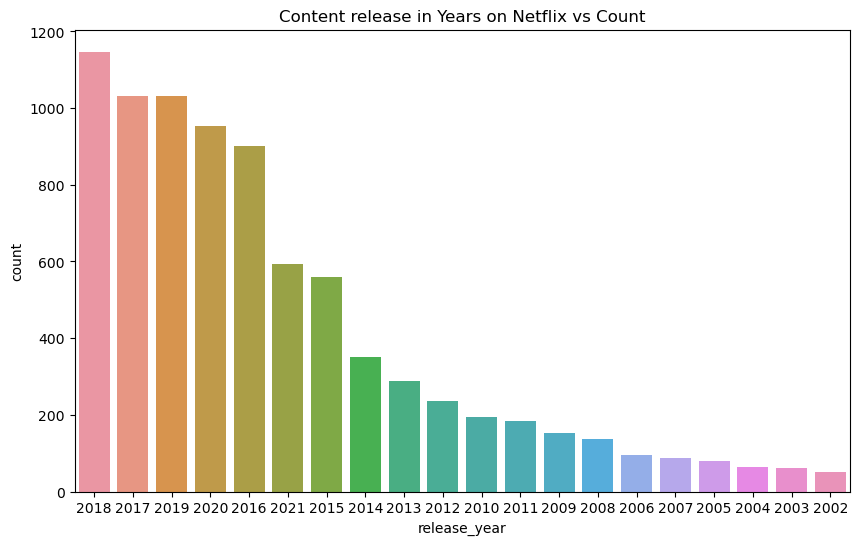

In [43]:
data.release_year.value_counts()[ :20]
plt.figure(figsize = (10,6))
sns.countplot(x = "release_year" ,order = data["release_year"].value_counts().index[0:20],data = data) #number of content released by netflix per year both tv shows and movies # 2018 is the year netflix released highest number of content, the year before covid-19
plt.title("Content release in Years on Netflix vs Count")

Text(0.5, 1.0, 'Top 20 Genres on Nerflix')

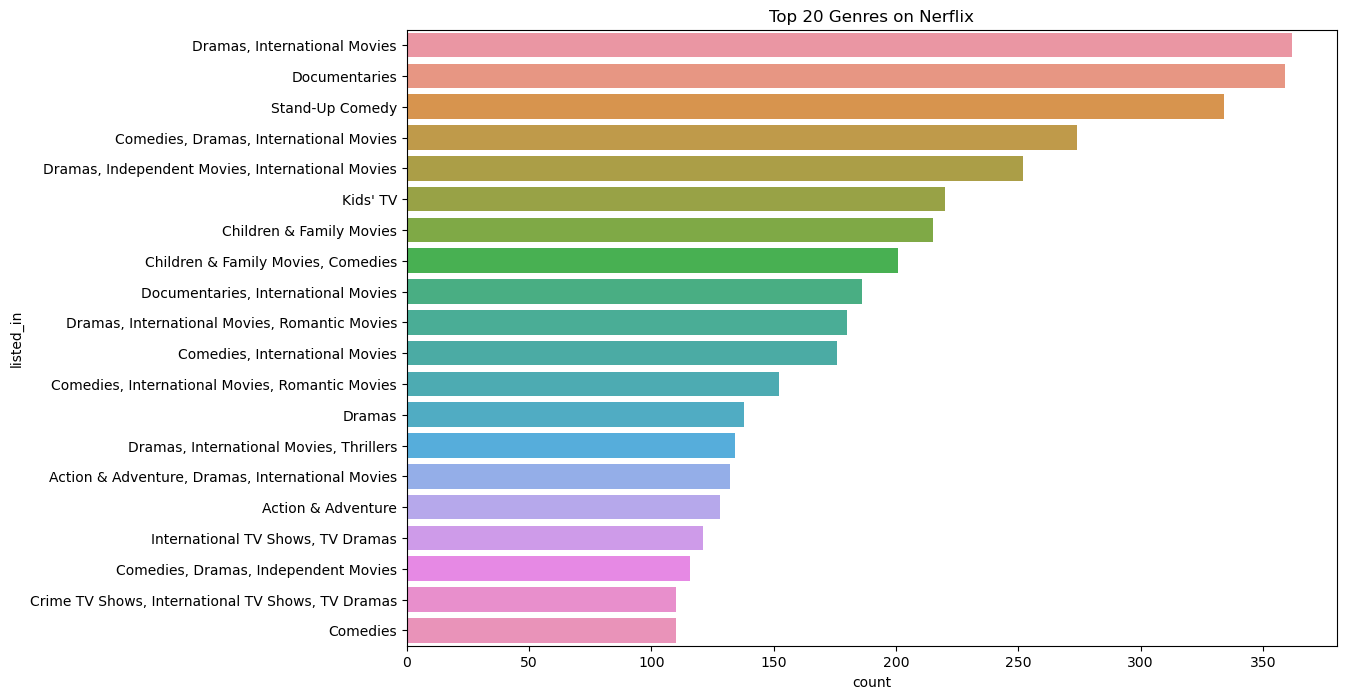

In [44]:
data.listed_in.value_counts()
plt.figure(figsize = (12,8))
sns.countplot(y = "listed_in" ,order = data["listed_in"].value_counts().index[0:20],data = data) # most popular drama on Netflix is Drama,International Movies
plt.title("Top 20 Genres on Nerflix")

In [45]:
#Summary of Useful Information from dataset 
# Netflix has more Movies than TV shows
#Most numbers of Movies and TV shows are produced by the United States followed by India 
#Most of content of Netflix is for MAture Audiences(Movies ans TV Shows)
#2018 is the year in which Netflix released alot more content compared to other years
#International Movies and Dramas are the most populer Genres on Netflix 

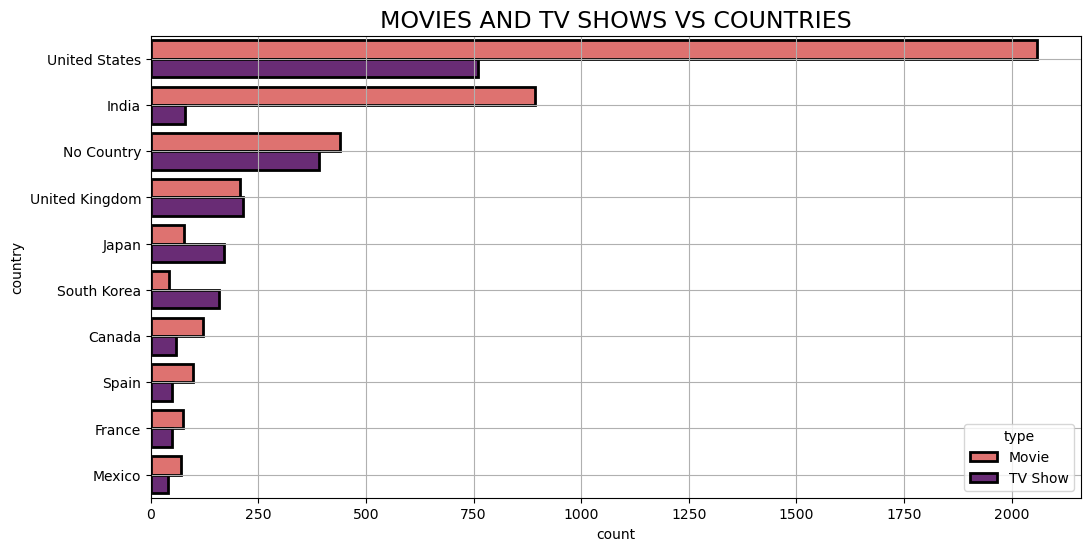

In [46]:
fig = plt.figure(figsize=(12,6))
sns.countplot(data = data,y = 'country', order = data["country"].value_counts().index[:10],hue = 'type',palette = 'magma_r',ec='black',lw=2)
plt.title("MOVIES AND TV SHOWS VS COUNTRIES",fontsize=17)
plt.grid(True)
plt.show()